# Figure 5: Relative humidity modes

*Fig. 5 caption:*  
Frequency of relative humidity with height for a) ICON-LEM and b) the radiosondes (Aug.-Dec. 2020). The gray dashed lines mark the 500 and 600 m levels.  

In [1]:
import xarray as xr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
np.__version__

'1.18.1'

## 1. Data

In [3]:
# Radiosonde data for 08.2020 to 12.2020
path = "/data/radiosondes/"
file = "nyalesund_RS_202008-12.nc"

RS_ds = xr.open_dataset(path+file)
RS_ds.rh.values = RS_ds.rh.values*100  # so that it is in percent 

path = "data/model/12UTC_icon_lem_meteograms/"
file = "nyalesund_icon_lem_12UTC_meteogram_202008-12.nc"
icon_lem_ds = xr.open_dataset(path+file)

# Select first timestep and only below 1020 m
icon_lem_ds_sub = icon_lem_ds[['REL_HUM']].where((icon_lem_ds.height_2 < 1020) &
                                                 (icon_lem_ds.time.dt.minute == 0 ) & 
                                                 (icon_lem_ds.time.dt.second == 0), drop=True)


### 1.1 Reformat the Radiosonde 
Use levels with a specified depth which are uniform. For this I should count how many I have per level. 

In [4]:
# Reformat Radiosonde data so that I can compute mean over time for same heights
# Create data set to fill

RS_ds_sub = RS_ds.where((RS_ds.alt<1000) & (RS_ds.wdir<361),drop=True)

height_arr = np.linspace(50,1025,50)

ds_RS_uniform_format = xr.Dataset(data_vars={'REL_HUM':(['time','height'], 
                                                        np.empty((len( icon_lem_ds_sub.time), len(height_arr))) )}, 
                                          coords=dict(time= icon_lem_ds_sub.time, height = height_arr))


In [5]:
level_count = np.empty(len(height_arr)-1)

for h in range(len(height_arr)-1):

        h_i = height_arr[h]
        h_iplus1 = height_arr[h+1]

        rh_subset = RS_ds_sub.rh.where((RS_ds_sub.alt > h_i) & (RS_ds_sub.alt <= h_iplus1), drop=True).values
        level_count[h] = len(rh_subset)


#### 1.1.2 Measurements per level

<IPython.core.display.Javascript object>


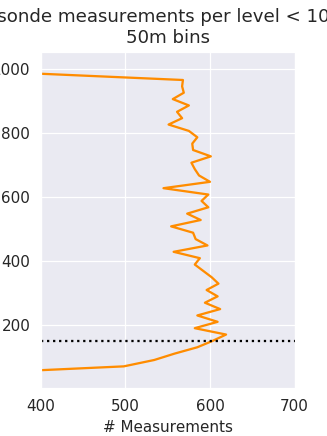

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(3,4))
plt.plot(level_count, height_arr[0:-1], color="darkorange")
plt.suptitle("Radiosonde measurements per level < 1000km")
plt.title("50m bins")
plt.xlabel("# Measurements")
plt.ylabel("Height in m")
plt.xlim(400,700)
plt.axhline(y=150, linestyle="dotted", color="black")

In [7]:
# Take mean over all RS measurements for all values between two height levels. Here using height so that 
# there is a top and a bottom and the level which the values is assigned to is in between.

# First select all times for a single day:
for t in range(len(icon_lem_ds.time)): 
    tmp_rs = RS_ds_sub.where((RS_ds_sub.time.dt.day == icon_lem_ds.time.dt.day[t]) 
                         & (RS_ds_sub.time.dt.month == icon_lem_ds.time.dt.month[t]),
                         drop=True )
    for h in range(len(height_arr)-1):

        h_i = height_arr[h]
        h_iplus1 = height_arr[h+1]

        rh_subset = tmp_rs.rh.where((tmp_rs.alt > h_i) & (tmp_rs.alt <= h_iplus1), drop=True).values
        
        if not np.isnan(rh_subset.mean()):
            ds_RS_uniform_format.REL_HUM.values[t,h] = np.nanmean(rh_subset)
        else:
            ds_RS_uniform_format.REL_HUM.values[t,h] = np.nan

/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value

/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value

/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value

/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value

/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value

/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/tkiszler/sw/miniconda3/envs/quickenv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value

IndexError: index 139 is out of bounds for axis 0 with size 139

## 2. Histogram

I have to create my own bins for the pmeshcolor plot otherwise there are gaps between the levels.
The output format should be:
```
C.shape = (nbins, len(height))   
X.shape = nbins  
Y.shape = len(height) <- these I don't have to bin.
```

In [9]:
# Create bins for histogram for ICON
nbins = 25
rh_lem_binned = np.empty((nbins, len(icon_lem_ds_sub.height_2)))

for i in range(len(icon_lem_ds_sub.height_2)):
    rh_lem_binned[:,i] = np.asarray(np.histogram(icon_lem_ds_sub.REL_HUM.isel(height_2=i), 
                                                 bins=nbins, range=(30,102), 
                                                 density=True)[0])

# For pcolormesh create a meshgrid
X_lem, Y_lem = np.meshgrid(np.histogram(icon_lem_ds_sub.REL_HUM.isel(height_2=i), 
                                        bins=25, range=(30,102))[1],
                           icon_lem_ds_sub.height_2.values)


(16, 26) (16, 26) (25, 16)


In [13]:
# Radiosondes counting everything to the bin it belongs to.
rh_rs_binned = np.empty((nbins, len(ds_RS_uniform_format.height)-1))

for i in range(len(ds_RS_uniform_format.height)-1):
    RS_tmp = RS_ds.where((RS_ds.alt >= ds_RS_uniform_format.height[i]) & 
                (RS_ds.alt < ds_RS_uniform_format.height[i+1]), drop = True ).rh.values
    rh_rs_binned[:,i] = np.histogram(RS_tmp, density=True, bins=nbins, range=(30,102))[0]

# For pcolormesh create a meshgrid
X_rs, Y_rs = np.meshgrid(np.histogram(ds_RS_uniform_format.REL_HUM.isel(height=0), density=False, 
                           bins=nbins, range=(30,102))[1],
                           ds_RS_uniform_format.height.values)


(50, 26) (50, 26) (25, 49)


In [14]:
# For contour plot X and Y must have same shape/size as Z. 
# To achieve this I have to not select the boundaries of the layers or bins but select the center points.

bin_dist_half = (np.histogram(ds_RS_uniform_format.REL_HUM.isel(height=0), density=False, bins=nbins, range=(30,102))[1][1] \
- np.histogram(ds_RS_uniform_format.REL_HUM.isel(height=0), density=False, bins=nbins, range=(30,102))[1][0])/2

hist_X = np.histogram(ds_RS_uniform_format.REL_HUM.isel(height=0), density=False, bins=nbins, range=(30,102))[1][0:-1] \
       + bin_dist_half

# Get half level values:
height_dist_half = (ds_RS_uniform_format.height.values[1]-ds_RS_uniform_format.height.values[0])/2
height_Y = ds_RS_uniform_format.height.values[0:-1] + height_dist_half

X_rs, Y_rs = np.meshgrid(hist_X, height_Y )

X_lem, Y_lem = np.meshgrid(hist_X, icon_lem_ds_sub.height_2.values)


<IPython.core.display.Javascript object>


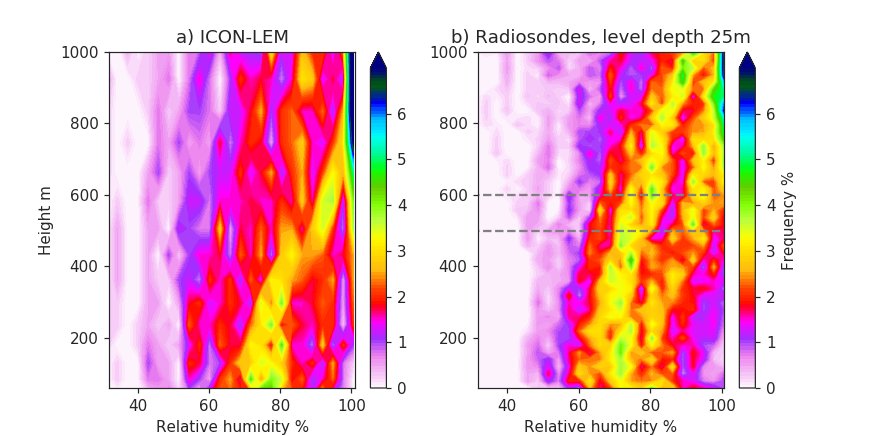

In [16]:
sns.set_style("ticks")
fig = plt.figure(figsize=(8,4))
#fig.suptitle("Histogram single levels occurrence numbers")
cm_levels=np.linspace(0,7,100)

fig.add_subplot(121)
plt.title("a) ICON-LEM")
cval = plt.contourf(X_lem, Y_lem, rh_lem_binned.T*100, levels=cm_levels, cmap="gist_ncar_r", extend="max")
cbar = plt.colorbar(cval, ticks = range(0,7,1))
#cbar.set_label("count")
plt.xlim(32,101)
plt.ylim(60,1000)
plt.xlabel("Relative humidity %")
plt.ylabel("Height m")

fig.add_subplot(122)
plt.title("b) Radiosondes, level depth 25m")
cval2 = plt.contourf(X_rs, Y_rs, rh_rs_binned.T*100, levels = cm_levels, cmap="gist_ncar_r", extend="max")
cbar2 = plt.colorbar(cval2, ticks = range(0,7,1))
cbar2.set_label("Frequency %")
plt.xlim(32,100.5)
plt.ylim(60,1000)
plt.xlabel("Relative humidity %")

plt.plot([30,102], [600,600], linestyle="dashed", color="grey")
plt.plot([30,102], [500,500], linestyle="dashed", color="grey")

plt.savefig("fig_5_rh_radiosondes_model_BL_distrib.png", dpi=300, format="png")